In [2]:
import pandas as pd
import utils as my

## Dataset

In [6]:
dataset_path = "./uci-secom.csv"
target_name = "Pass_Fail"
train_size = 0.75

dataset = pd.read_csv(dataset_path)
dataset.rename(columns={"Pass/Fail": target_name}, inplace=True)
print(">> Data shape:", dataset.shape)
dataset.head(10)

>> Data shape: (1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass_Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### Missing values and duplicates

In [8]:
print(">> Missing values:", dataset.isnull().any().sum())
print(">> Duplicate values:", dataset.duplicated().sum())

# dataset.drop_duplicates(inplace=True, keep='first', ignore_index=True)
# print(">> Duplicate values:", dataset.duplicated().sum())

>> Missing values: 538
>> Duplicate values: 0


### Unique values

In [9]:
n_data = dataset.shape[0]

print(">> n_unique = 1:       ", len(my.get_nunique_features(dataset, value=1)))
print(">> n_unique = n_data:  ", len(my.get_nunique_features(dataset, value=n_data)))
print(">> n_unique > n_data-5:", len(my.get_nunique_features(dataset, value=n_data-5, kind='greater_than')))
print(">> n_unique < 3        ", len(my.get_nunique_features(dataset, value=2, kind='less_than')))

>> n_unique = 1:        116
>> n_unique = n_data:   1
>> n_unique > n_data-5: 6
>> n_unique < 3         116


## Data types

### Ignore features

In [20]:
dataset = pd.read_csv(dataset_path)
print(">> Initial:\n", dataset.dtypes.value_counts())

ignore_features = ['Time']
ignore_features += my.get_nunique_features(dataset, value=1)
ignore_features += my.get_nunique_features(dataset, value=dataset.shape[0])
ignore_features = list(set(ignore_features))

if target_name in ignore_features:
    ignore_features.remove(target_name)

print(ignore_features)
dataset.drop(ignore_features, axis=1, inplace=True)
print(">> After dropping features:\n", dataset.dtypes.value_counts())

>> Initial:
 float64    590
object       1
int64        1
dtype: int64
['509', '506', '256', '313', '234', '399', '186', '401', '375', '141', '191', '532', '13', '461', '328', '536', '233', '235', '529', '42', '243', 'Time', '325', '380', '231', '242', '364', '263', '322', '422', '463', '259', '466', '192', '69', '327', '450', '374', '538', '262', '237', '49', '507', '398', '178', '502', '465', '505', '458', '373', '240', '481', '149', '230', '260', '329', '537', '326', '403', '330', '379', '315', '257', '189', '395', '501', '402', '179', '462', '372', '531', '464', '530', '370', '535', '369', '115', '533', '515', '508', '514', '378', '261', '236', '229', '266', '397', '371', '534', '232', '513', '314', '504', '400', '193', '503', '528', '498', '52', '512', '264', '265', '284', '451', '226', '258', '241', '394', '381', '97', '414', '194', '396', '276', '190', '5', '404', '449']
>> After dropping features:
 float64    473
int64        1
dtype: int64


### Numerical features

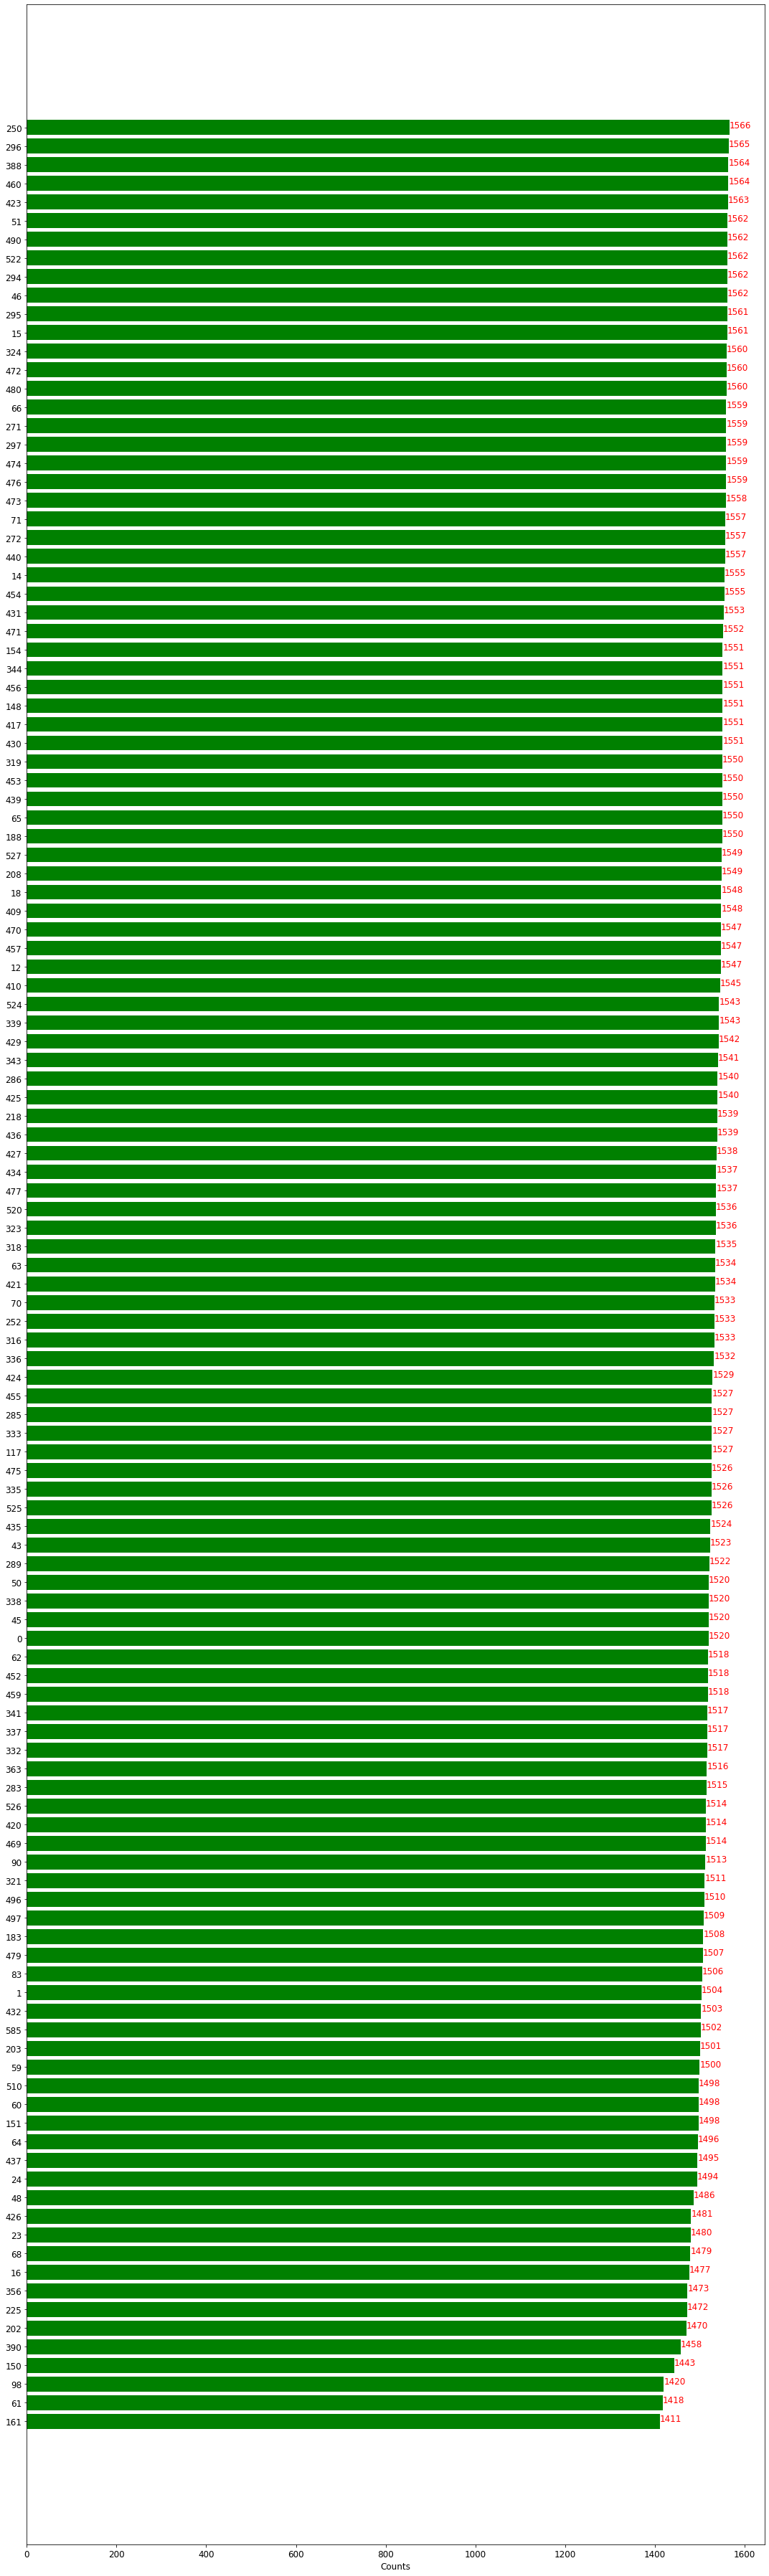

In [14]:
n_data = dataset.shape[0]
numerical_features = dataset.select_dtypes(include='number').columns.values
feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.9, kind='greater_than')
my.show_counts(dataset, feature_names)

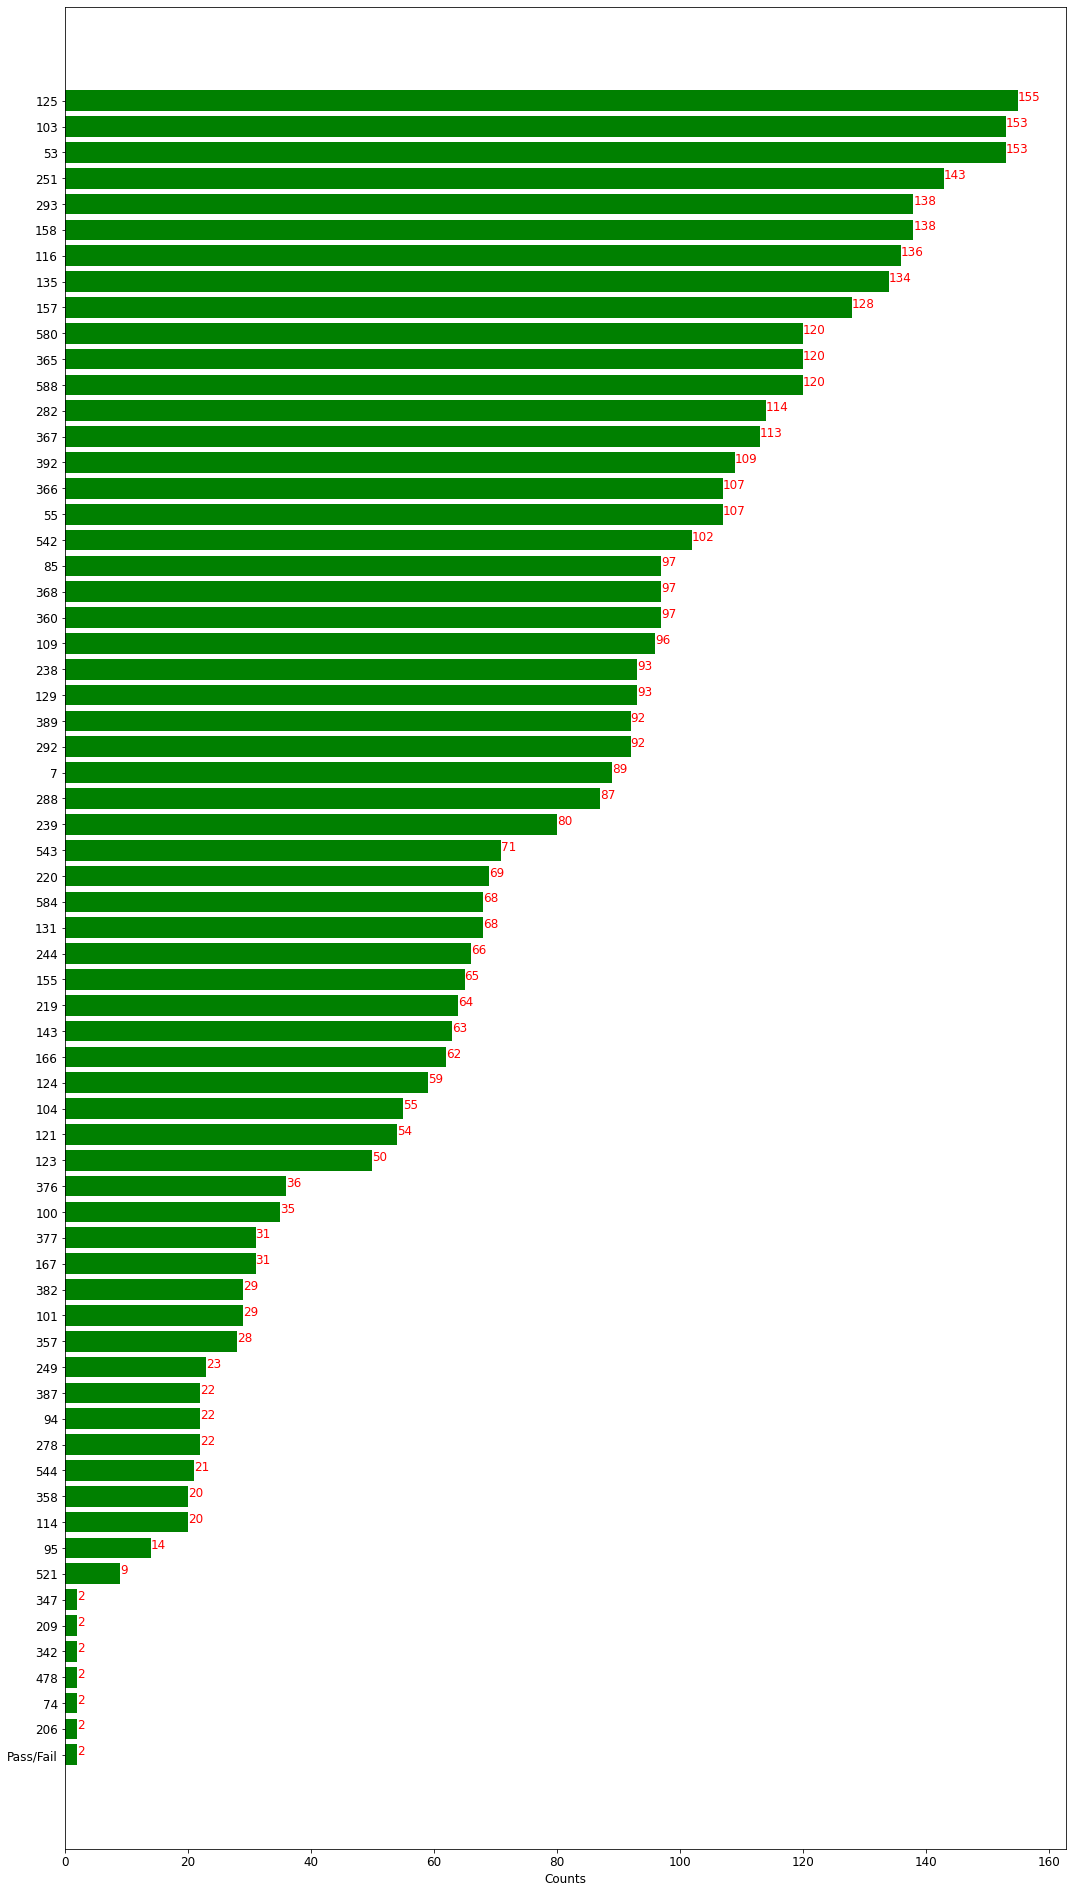

In [15]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.1, kind='less_than')
my.show_counts(dataset, feature_names)

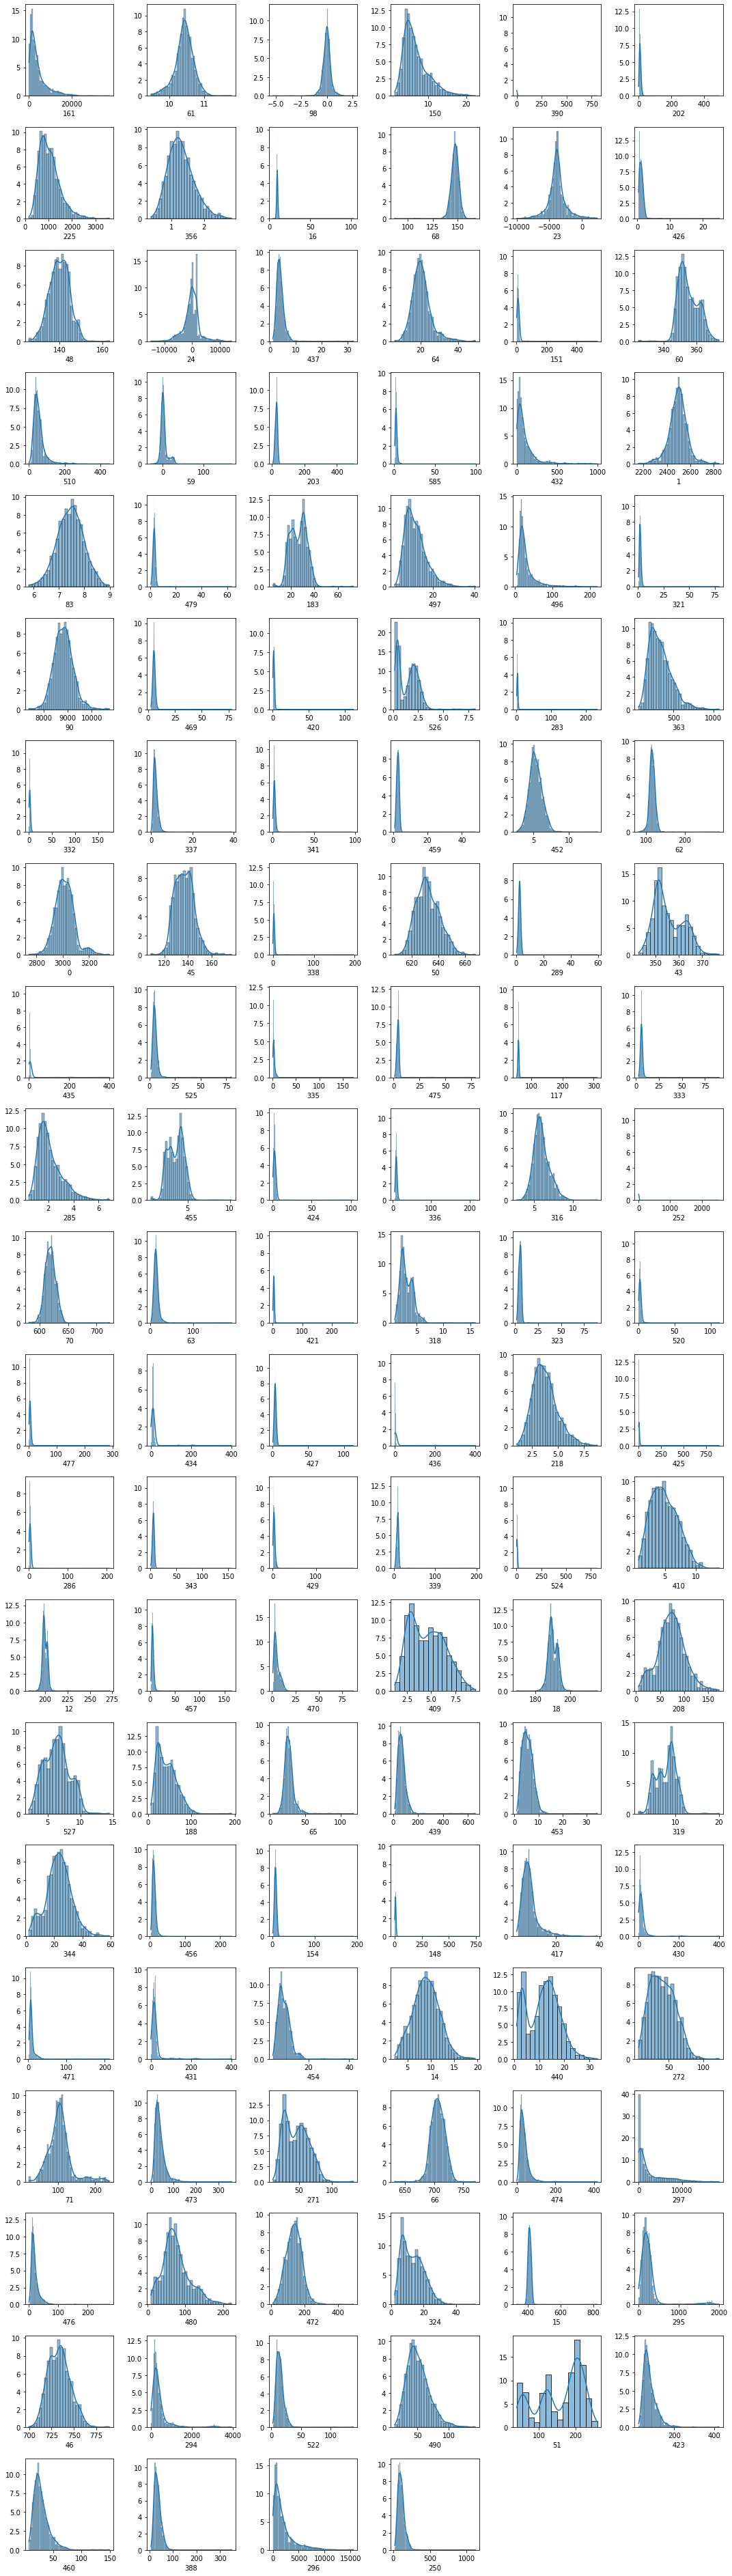

In [17]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.9, kind="greater_than")
my.show_histogram(dataset, feature_names, target=None, kde=True)

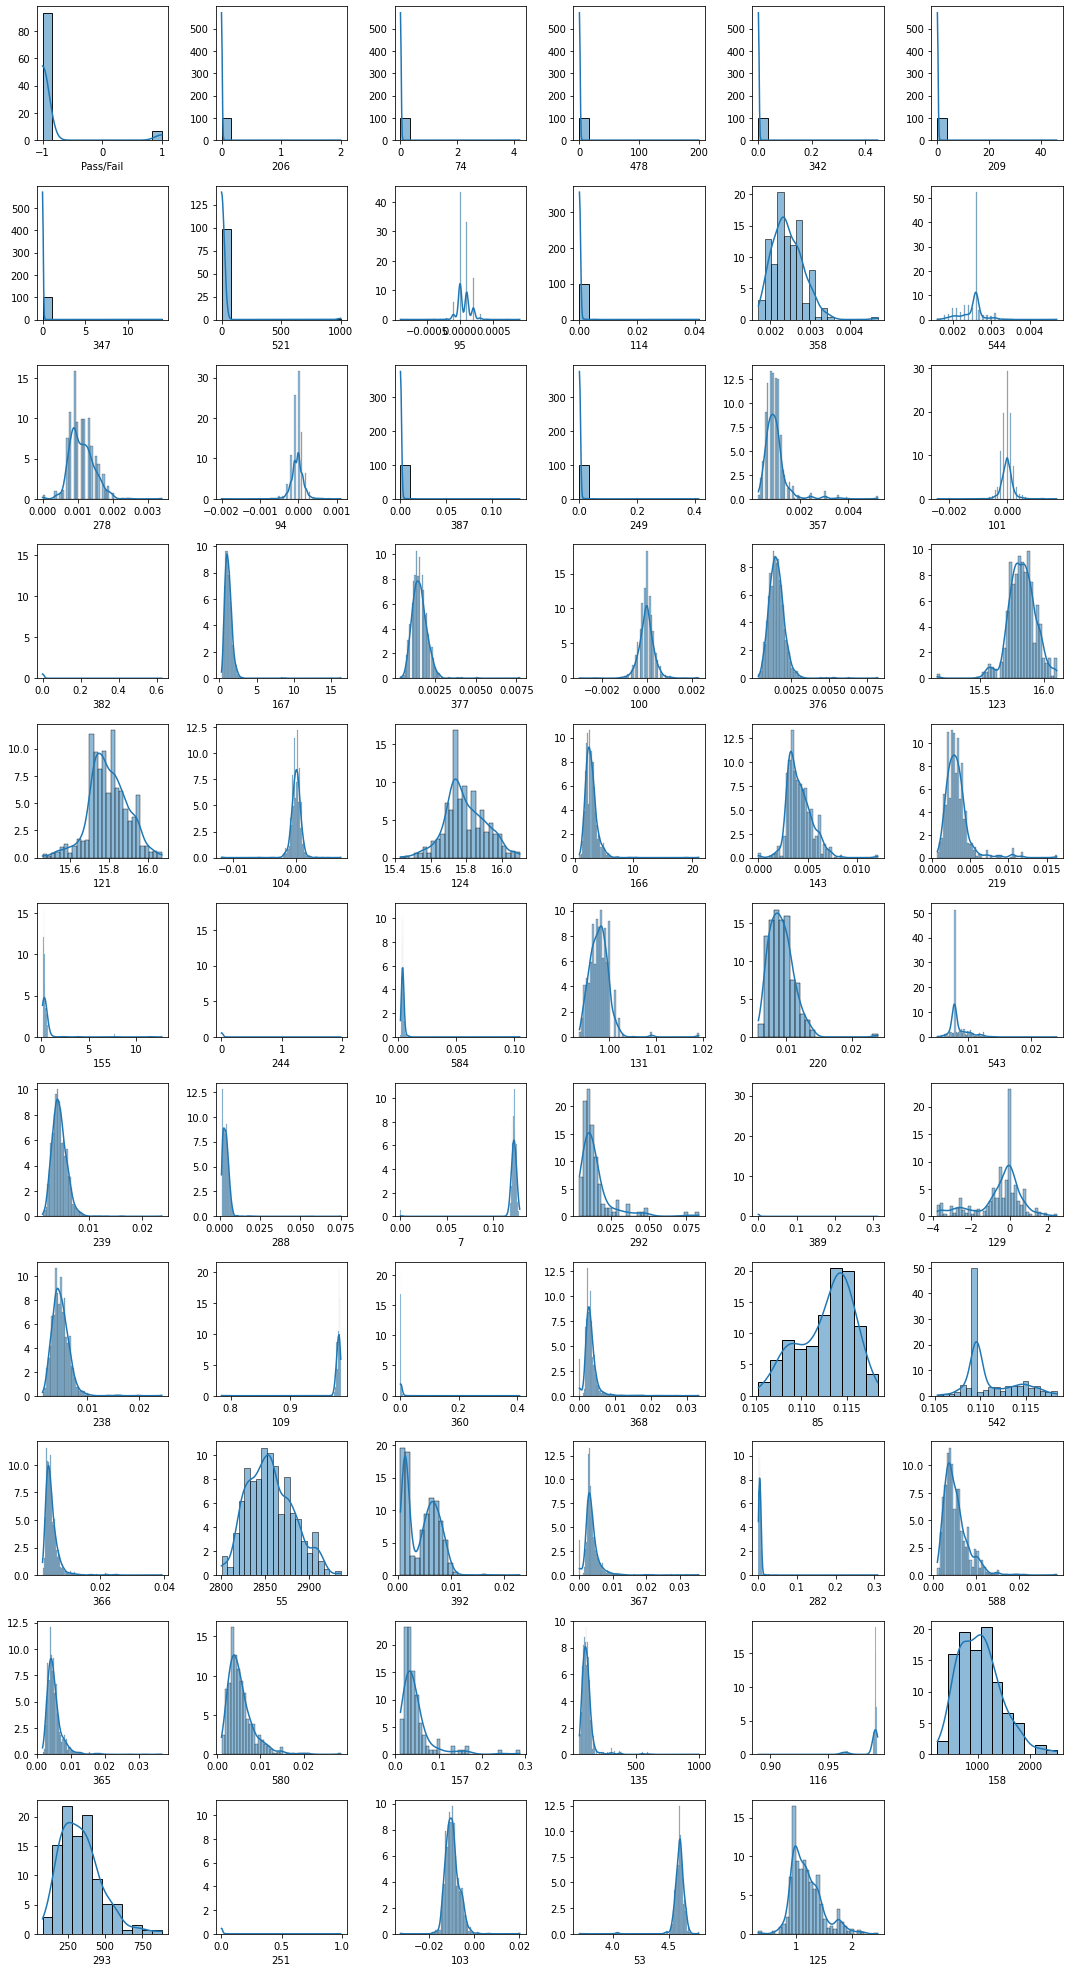

In [18]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.1, kind="less_than")
my.show_histogram(dataset, feature_names, target=None, kde=True)

### Categorical features

In [22]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
print(categorical_features)
# my.show_counts(dataset, categorical_features, color='blue')

[]


In [23]:
# feature_names = my.get_nunique_features(dataset[categorical_features], value=1, kind="greater_than")
# my.show_histogram(dataset, feature_names, target=target_name, xlabels=False)

### Ordinal features

In [11]:
ordinal_features = None
# my.show_histogram(dataset, ordinal_features, target=target_name)

### High cardinality features

In [12]:
high_cardianlity_features = None
# my.show_histogram(dataset, high_cardianlity_features, target=target_name)

### Group features

In [13]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

### Bin number features

In [14]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

## Correlations between features

### Numerical Features - Peason's R

In [28]:
numerical_features = dataset.select_dtypes(include='number').columns.values
dataset[numerical_features].isnull().any().sum()

422

In [30]:
dataset[numerical_features] = dataset[numerical_features].fillna(0, axis=1)
dataset[numerical_features].isnull().any().sum()

0

In [36]:
numerical_features = dataset.select_dtypes(include='number').columns.values
high_corr_features, (names, values) = my.get_high_corr_numerical(
                                        dataset, numerical_features, threshold=0.99)
high_corr_features

Pearson's R = 1.0000 - ['209' '478']
Pearson's R = 1.0000 - ['206' '478']
Pearson's R = 1.0000 - ['342' '347']
Pearson's R = 1.0000 - ['74' '478']
Pearson's R = 1.0000 - ['74' '347']
Pearson's R = 1.0000 - ['74' '342']
Pearson's R = 1.0000 - ['74' '209']
Pearson's R = 1.0000 - ['74' '206']
Pearson's R = 1.0000 - ['206' '347']
Pearson's R = 1.0000 - ['206' '342']
Pearson's R = 1.0000 - ['347' '478']
Pearson's R = 1.0000 - ['209' '342']
Pearson's R = 1.0000 - ['206' '209']
Pearson's R = 1.0000 - ['209' '347']
Pearson's R = 1.0000 - ['342' '478']
Pearson's R = 1.0000 - ['140' '275']
Pearson's R = 1.0000 - ['172' '174']
Pearson's R = 1.0000 - ['307' '309']
Pearson's R = 1.0000 - ['152' '287']
Pearson's R = 1.0000 - ['244' '382']
Pearson's R = 1.0000 - ['252' '390']
Pearson's R = 1.0000 - ['244' '516']
Pearson's R = 1.0000 - ['382' '516']
Pearson's R = 1.0000 - ['4' '275']
Pearson's R = 1.0000 - ['4' '140']
Pearson's R = 0.9999 - ['251' '389']
Pearson's R = 0.9999 - ['249' '387']
Pearson's 

['109',
 '110',
 '121',
 '123',
 '124',
 '135',
 '136',
 '137',
 '138',
 '140',
 '142',
 '143',
 '144',
 '147',
 '148',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '163',
 '164',
 '165',
 '166',
 '169',
 '170',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '180',
 '181',
 '183',
 '184',
 '185',
 '187',
 '195',
 '197',
 '198',
 '202',
 '203',
 '205',
 '206',
 '207',
 '209',
 '212',
 '213',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '244',
 '245',
 '246',
 '248',
 '249',
 '251',
 '252',
 '253',
 '254',
 '255',
 '267',
 '268',
 '282',
 '283',
 '288',
 '289',
 '291',
 '307',
 '312',
 '321',
 '342',
 '347',
 '358',
 '360',
 '382',
 '383',
 '384',
 '386',
 '389',
 '390',
 '4',
 '434',
 '435',
 '443',
 '53',
 '543',
 '547',
 '549',
 '550',
 '551',
 '553',
 '554',
 '564',
 '565',
 '572',
 '574',
 '579',
 '583',
 '584',
 '66',
 '74',
 '93']

In [41]:
print(len(high_corr_features))

high_corr_features = list(set(high_corr_features))
if target_name in high_corr_features:
    high_corr_features.remove(target_name)
    
print(len(high_corr_features))
print(high_corr_features)

114
114
['360', '74', '206', '307', '197', '140', '384', '267', '137', '321', '156', '143', '53', '207', '221', '164', '160', '282', '151', '173', '435', '135', '155', '249', '224', '158', '584', '148', '213', '389', '161', '202', '289', '244', '138', '579', '565', '183', '291', '358', '443', '288', '187', '251', '209', '347', '157', '434', '185', '170', '176', '220', '268', '142', '564', '110', '163', '283', '121', '174', '386', '172', '549', '195', '124', '109', '154', '198', '246', '175', '159', '583', '144', '253', '212', '554', '147', '223', '390', '136', '203', '550', '153', '93', '543', '123', '551', '254', '184', '255', '165', '252', '547', '180', '553', '4', '382', '222', '152', '383', '166', '169', '205', '574', '181', '312', '219', '572', '245', '66', '177', '248', '225', '342']


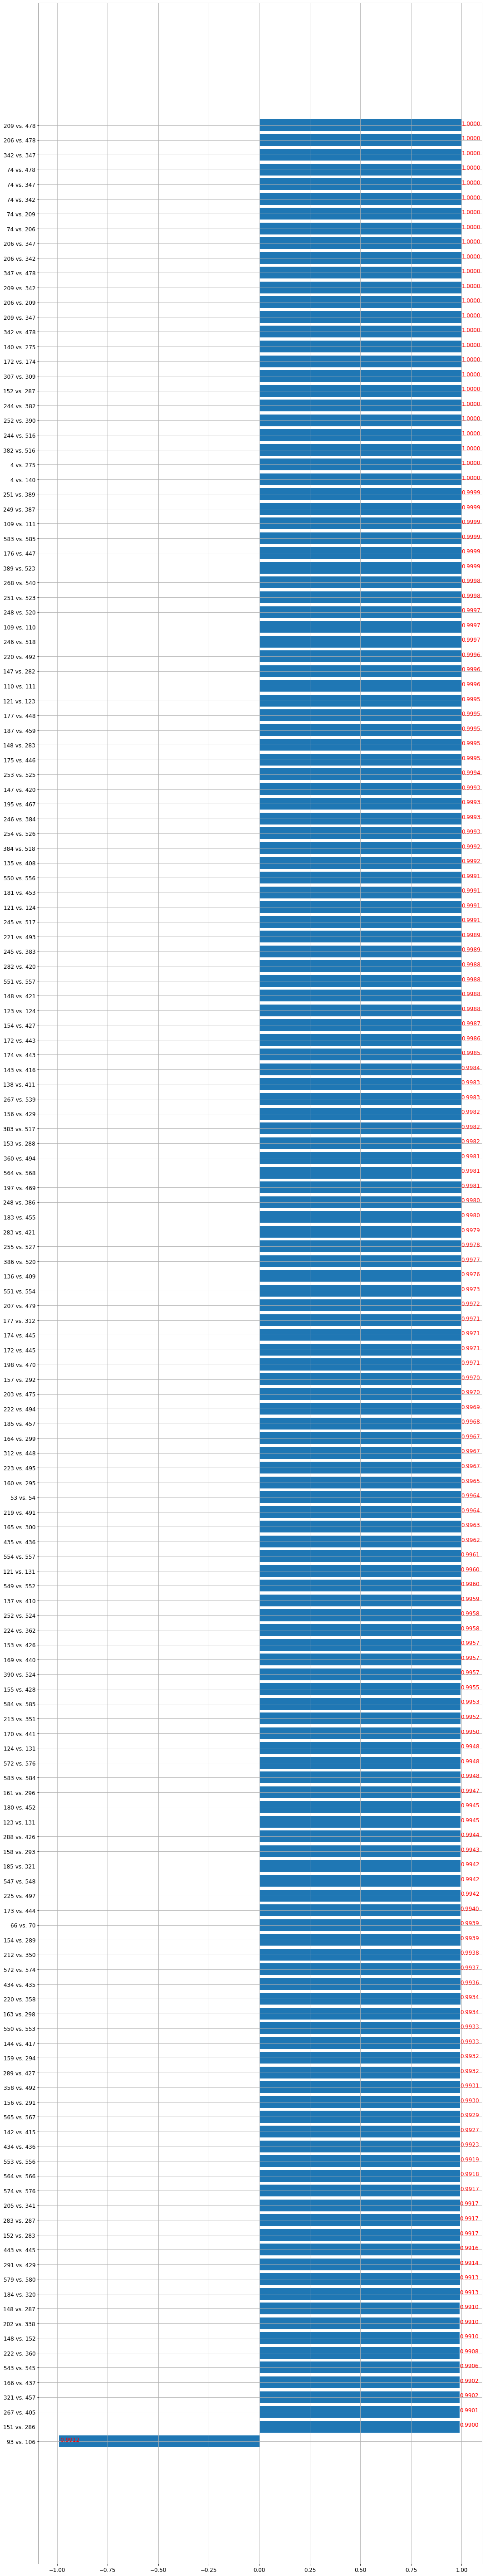

In [38]:
my.show_correlations(names, values, threshold=0.99)

### Categorical features - Cramer's V

In [42]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
print(categorical_features)
# dataset_encoded = pd.get_dummies(dataset[categorical_features])
# categorical_features = dataset_encoded.columns.values

# high_corr_features, (names, values) = my.get_high_corr_categorical(
#                                             dataset_encoded, categorical_features, threshold=0.8)

[]


In [43]:
# my.show_correlations(names, values, threshold=0.5)